### Trial Program to Extract Sum of Frame Differences

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## Helper Functions

In [3]:
def get_video(path):
  return cv2.VideoCapture(path)

def get_video_properties(cap):
  ''' Returns number of frames, height, and weight of a video'''
  n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

  ret, frame = cap.read()
  if ret:
    return n_frames, frame.shape[0], frame.shape[1]

def frame_placeholders(n, height, width):
  """ Returns a list of length n with entries np.zeros((height, width), dtype.uint8) """
  pholder = []
  for i in range(n):
    pholder.append(np.zeros((height, width, 3), dtype=np.uint8))
  return pholder

def frame_to_rgb(frame):
  """ Splits the frame into arrays of R, G, and B """
  r, g, b = cv2.split(frame)
  return np.asarray([r, g, b])

def reduce_noise(frame, upperthresh, lowerthresh):
  """ Changes pixel value to 0 if value > upperthresh or value < lowerthresh """
  colors = frame_to_rgb(frame)
  for color in colors:
    color[color < lowerthresh] = 0
    color[color > upperthresh] = 0
  return cv2.merge([colors[0],colors[1], colors[2]])

def save_temporal_features(frame, upperthresh, frame_idx):
  """ Saves the temporal features of the frame difference """
  colors = frame_to_rgb(frame)
  for color in colors:
    color[color!=0] = np.floor(upperthresh/frame_idx)
  return cv2.merge([colors[0],colors[1], colors[2]])

def add_frame(sumframe, newframe):
  """ Adds new frame to existing sum of frame differences """
  return cv2.add(sumframe, newframe)

def to_onerow(sum_frame, height, width):
    """ Converts the sum_frame matrix to a one-row array """
    return sum_frame.reshape(1, height*width)

## Initial review of the frames

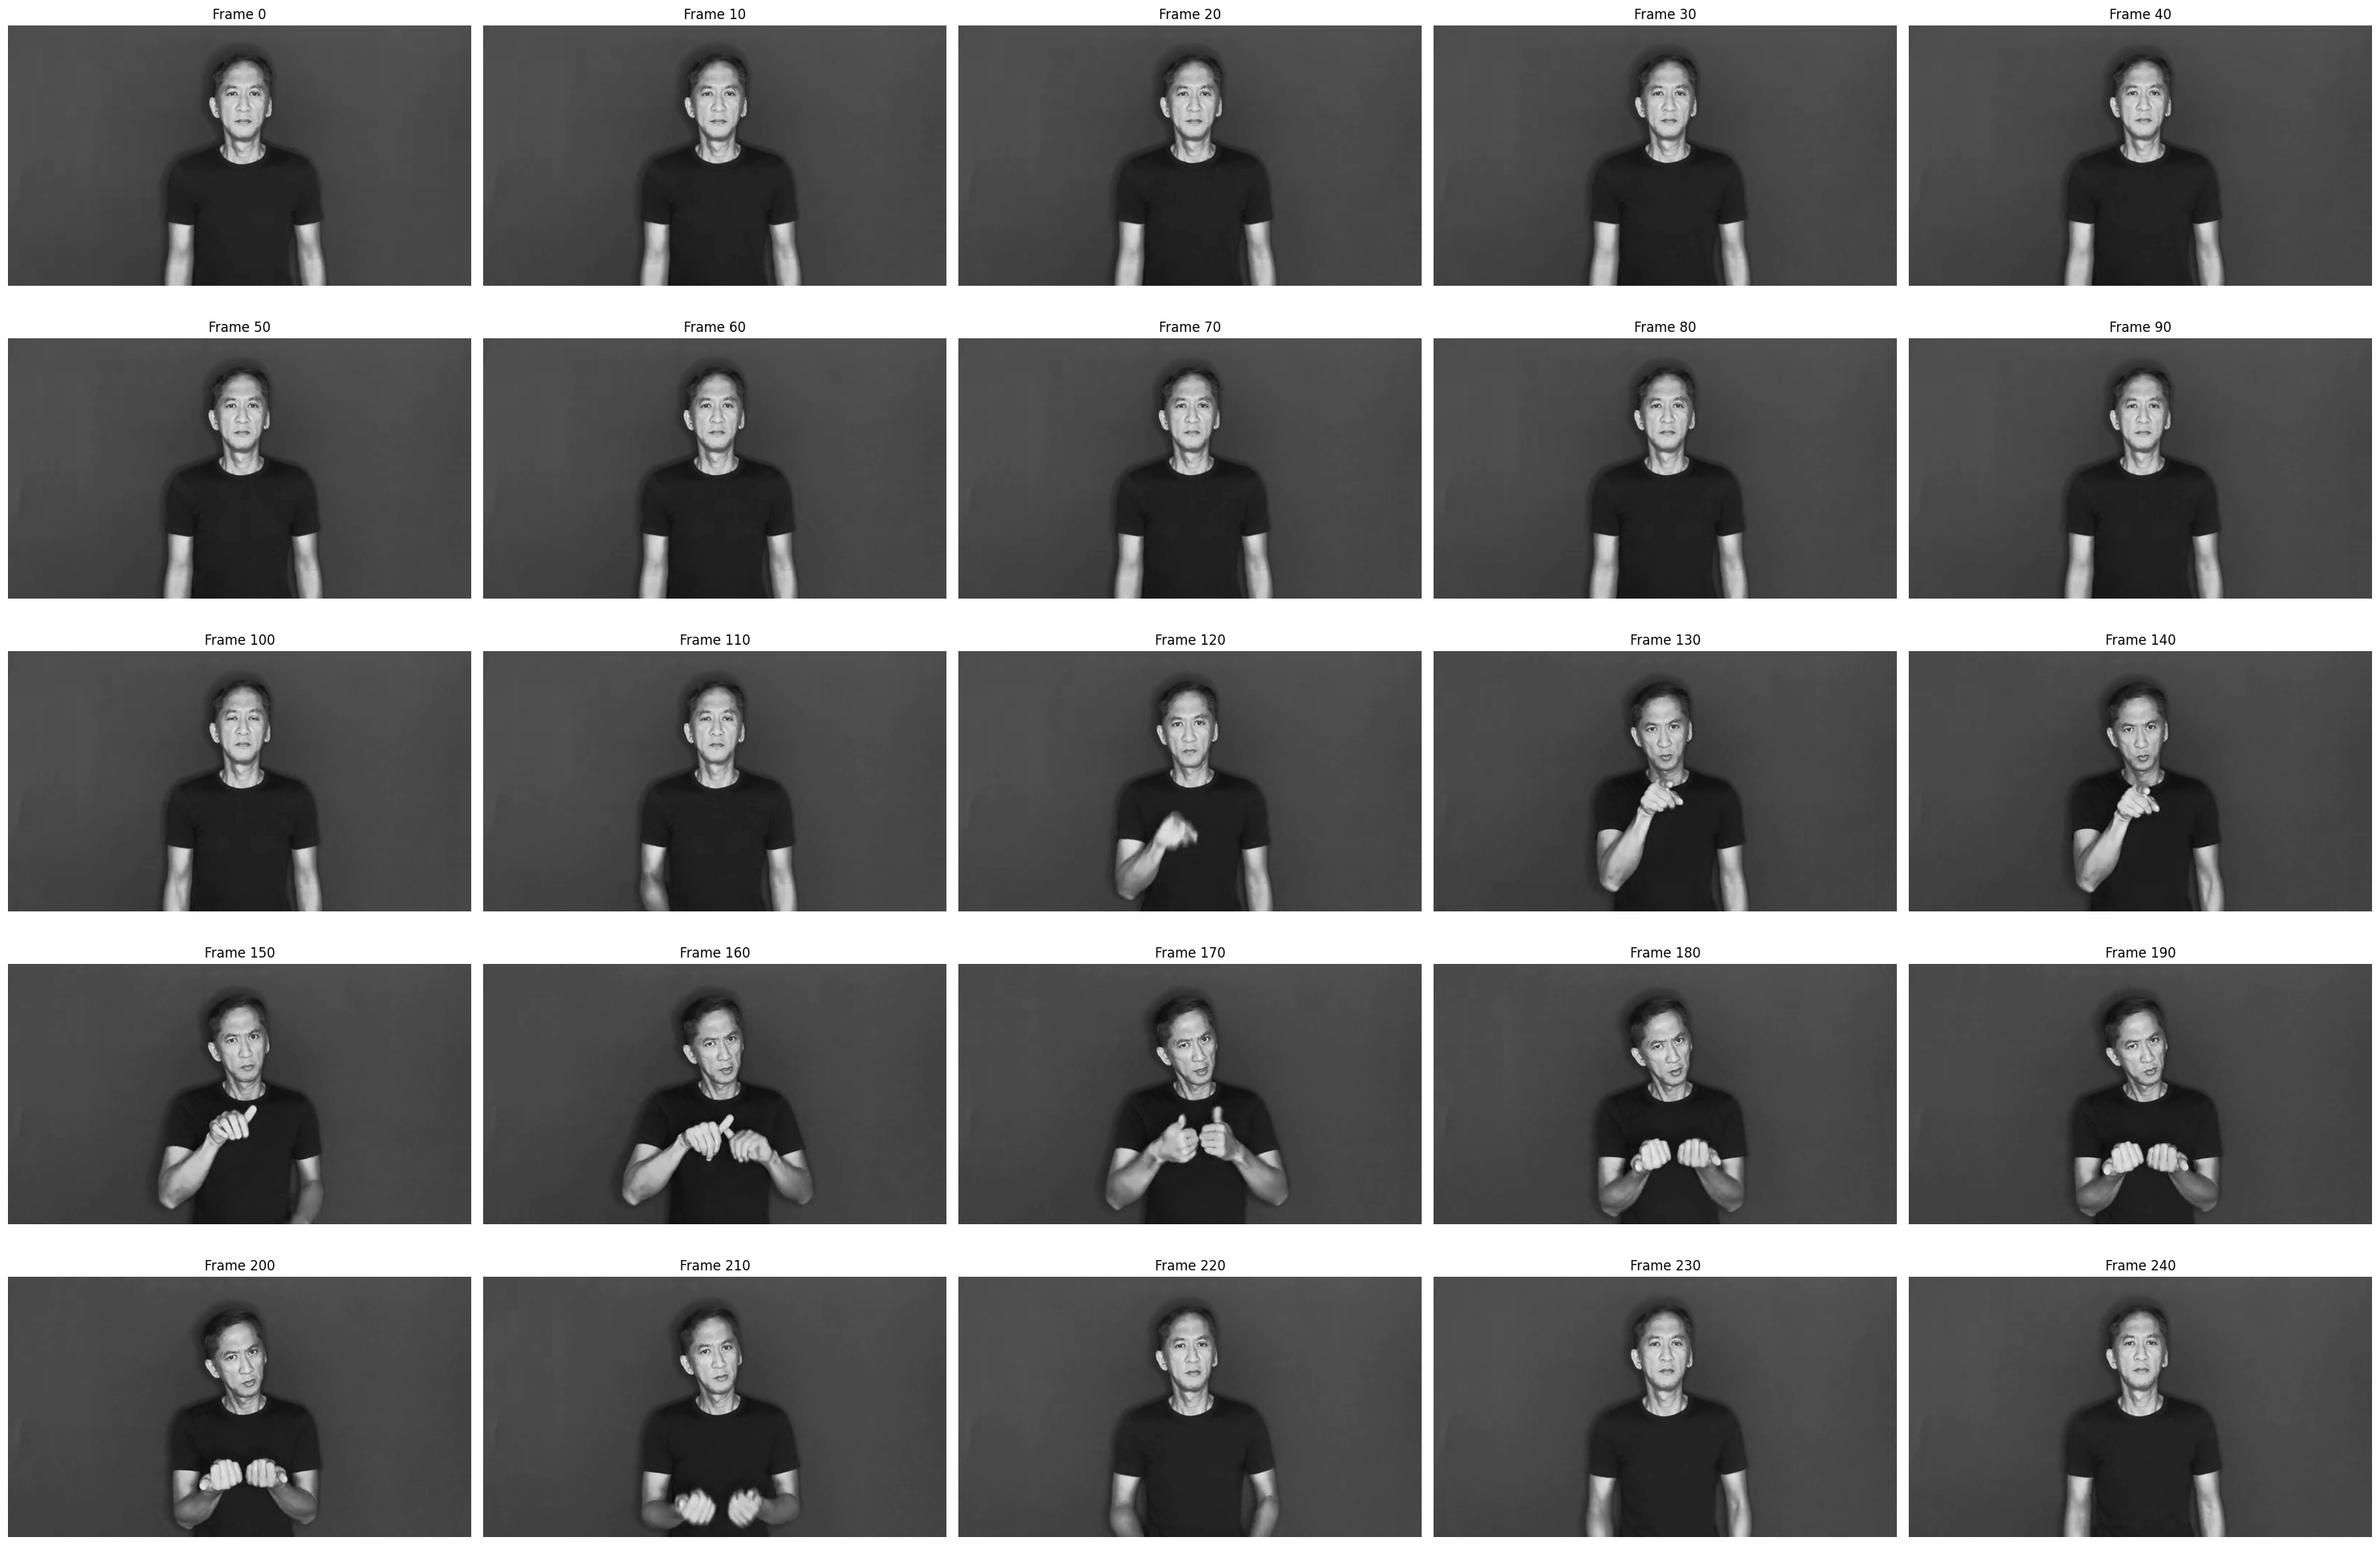

In [10]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

path = r"clips\4\13.MOV"
cap = get_video(path)

img_idx = 0  # track
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
for frame in range(n_frames):
  ret, img = cap.read()
  curr_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  if frame % 10 == 0:
    axs[img_idx].imshow(curr_img, cmap='gray', vmin=0, vmax=255)
    axs[img_idx].set_title(f'Frame {frame}')
    axs[img_idx].axis('off')
    img_idx +=1

plt.tight_layout()
plt.show()
cap.release()

In [11]:
curr_img.shape

(360, 640)

## Main Program

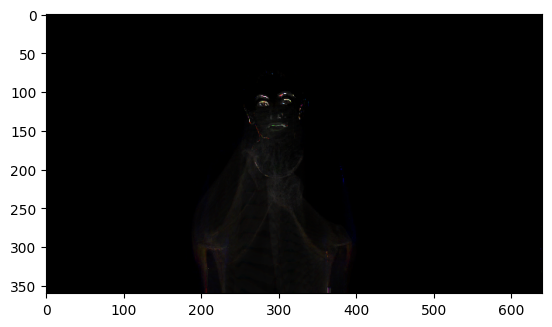

In [4]:
## main program


# importing MOV files
path = r'clips/34/4.MOV'
# path = r"C:\Users\Chan\Documents\kalej\Special Problem\LSA64 dataset\all\002_001_003.mp4"
cap = get_video(path)  # --------------

# video properties
n_frames, height, width = get_video_properties(cap)

# frame interval
frame_int = 1

# create placeholders
[prev_frame, diff_frame, sum_frame] = frame_placeholders(3, height, width)

for frame in range(n_frames):
  ret, img = cap.read()
  if ret == False:
    break

  if frame % frame_int == 0:
    curr_frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if frame == 0:
      prev_frame = curr_frame
    else:
      diff_frame = cv2.subtract(curr_frame, prev_frame)

      diff_frame = reduce_noise(diff_frame, upperthresh=200, lowerthresh=10)
      diff_frame = save_temporal_features(diff_frame, upperthresh=255, frame_idx=frame)

      sum_frame = add_frame(sum_frame, diff_frame)
      prev_frame = curr_frame

cap.release()

plt.imshow(sum_frame)

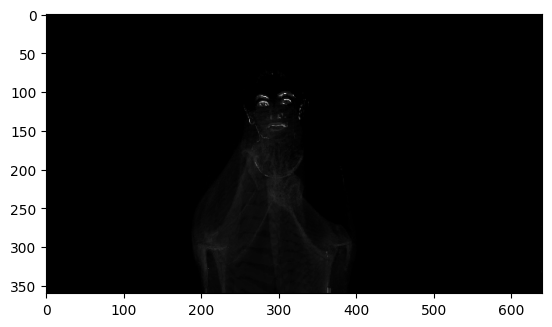

In [7]:
# grayscaled sum_frame
plt.imshow(cv2.cvtColor(sum_frame, cv2.COLOR_RGB2GRAY), cmap='gray')

In [1]:
from modules.module_SumFrameDiff import sumFrameDiff as sfd